In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('poster_data.csv',index_col = 0)
df.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,release_date,isAdult,genres,runtime,budget,original_language,overview,popularity,poster_path,production_companies,production_countries,revenue,status,vote_average,vote_count,averageRating,numVotes,director,actor
id,,,,,,,,,,,,,,,,,,,,,,,,
67,tt0445620,movie,Paradise Now,Paradise Now,2005.0,2005-02-14,0,"Crime,Drama,Thriller",91.0,0,en,Paradise Now is filmed from the perspective of...,3.714186,/qWZkYa8VdcDZk8uzRB2PfhpM9IL.jpg,Lama Films,PS,3357075.0,Released,6.9,63.0,7.4,21584.0,Hany Abu-Assad,Ali Suliman
76,tt0112471,movie,Before Sunrise,Before Sunrise,1995.0,1995-01-27,0,"Drama,Romance",105.0,2500000,en,"A dialogue marathon of a film, this fairytale ...",11.304979,/jsQy4ZbPHA8hE2O6QU05PpofI61.jpg,Detour Film Production,AT,5535405.0,Released,7.7,984.0,8.1,245272.0,Richard Linklater,Ethan Hawke
80,tt0381681,movie,Before Sunset,Before Sunset,2004.0,2004-02-10,0,"Drama,Romance",80.0,2700000,en,Nine years ago two strangers met by chance and...,7.048957,/gycdE1ARByGQcK4fYR2mgpU6OO.jpg,Castle Rock Entertainment,US,15992615.0,Released,7.6,734.0,8.0,214434.0,Richard Linklater,Ethan Hawke
92,tt0169024,movie,Megacities,Megacities,1998.0,1998-08-12,0,Documentary,94.0,0,en,Megacities is a documentary about the slums of...,0.406137,/svOFuJ0W3UTLqof10DVejjq94sw.jpg,None,AT,0.0,Released,7.0,3.0,7.5,775.0,Michael Glawogger,Shankar Loutakke
99,tt0185125,movie,All About My Mother,Todo sobre mi madre,1999.0,1999-04-19,0,Drama,101.0,8272296,es,A single mother in Madrid sees her only son di...,10.000915,/sQdalmBSUiaU0QCgZKBfy0l2vUR.jpg,Renn Productions,ES,67872296.0,Released,7.4,337.0,7.8,82744.0,Pedro Almodóvar,Cecilia Roth


In [9]:
df['target'] = np.where(df.averageRating >= 6.5 , 1, 0)
df.target.value_counts()

1    3243
0    2470
Name: target, dtype: int64

# class balance

In [11]:
df.target.value_counts(normalize = True)

1    0.567653
0    0.432347
Name: target, dtype: float64

<AxesSubplot:ylabel='target'>

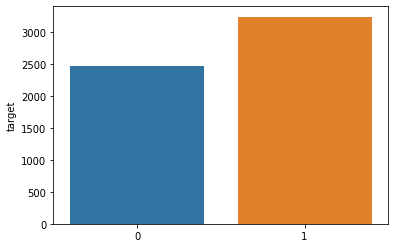

In [12]:
sns.barplot(x=[1, 0], y=df.target.value_counts())

In [15]:
df.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'startYear',
       'release_date', 'isAdult', 'genres', 'runtime', 'budget',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'revenue', 'status',
       'vote_average', 'vote_count', 'averageRating', 'numVotes', 'director',
       'actor', 'target'],
      dtype='object')

In [16]:
numerical = ['startYear', 'runtime', 'budget', 'revenue', 'averageRating']

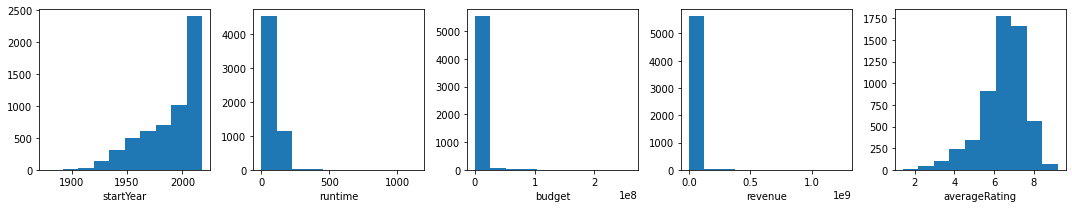

In [19]:
f,a = plt.subplots(1, 5,figsize=(15,3))
a = a.ravel()
for i,ax in enumerate(a):
    ax.hist(df[numerical[i]].values)
    ax.set_xlabel(numerical[i])
plt.tight_layout()
plt.savefig('numeric.png')

In [21]:
genres_list = []
for i in df.genres:
    genres_list+=i.split(',')
genres_full = list(set(genres_list))

dic={}
for i in genres_full:
    dic[i] = genres_list.count(i)

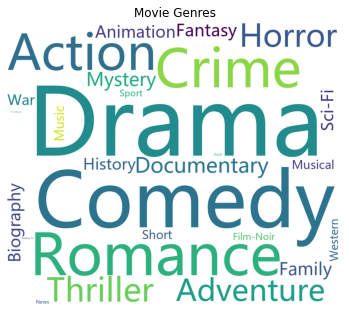

In [24]:
wordcloud = WordCloud(  background_color='white',font_path = 'msyh.ttc', width=1000, height=860, margin=2).generate_from_frequencies(dic)

plt.figure (figsize= (6,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Movie Genres')
plt.savefig('genres.png')
plt.show()

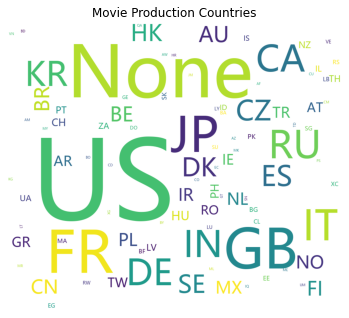

In [25]:
wordcloud1 = WordCloud(  background_color='white',font_path = 'msyh.ttc', width=1000, height=860, margin=2). \
generate_from_frequencies(df.production_countries.value_counts().to_dict())

plt.figure (figsize= (6,6))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Movie Production Countries')
plt.savefig('countries.png')
plt.show()

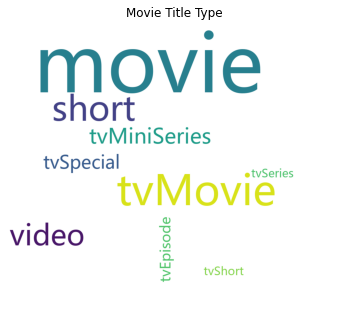

In [26]:
wordcloud2 = WordCloud(  background_color='white',font_path = 'msyh.ttc', width=1000, height=860, margin=2). \
generate_from_frequencies(df.titleType.value_counts().to_dict())

plt.figure (figsize= (6,6))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title('Movie Title Type')
plt.savefig('type.png')
plt.show()

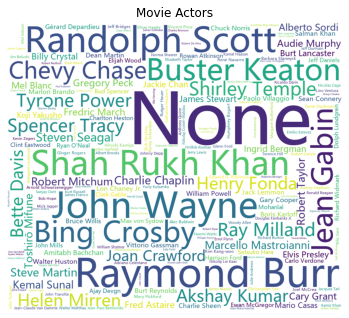

In [27]:
wordcloud3 = WordCloud(  background_color='white',font_path = 'msyh.ttc', width=1000, height=860, margin=2). \
generate_from_frequencies(df.actor.value_counts().to_dict())

plt.figure (figsize= (6,6))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title('Movie Actors')
plt.savefig('actor.png')
plt.show()

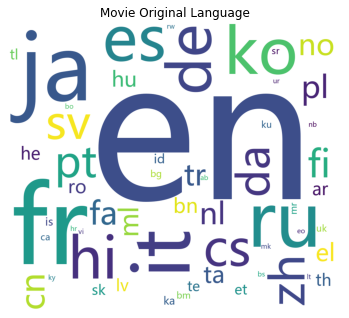

In [28]:
wordcloud4 = WordCloud(  background_color='white',font_path = 'msyh.ttc', width=1000, height=860, margin=2). \
generate_from_frequencies(df.original_language.value_counts().to_dict())

plt.figure (figsize= (6,6))
plt.imshow(wordcloud4)
plt.axis('off')
plt.title('Movie Original Language')
plt.savefig('language.png')
plt.show()

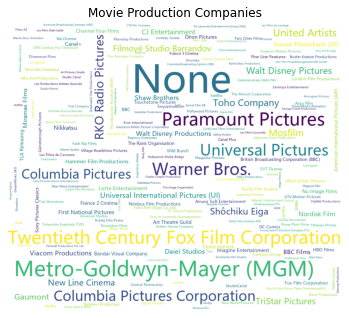

In [29]:
wordcloud5 = WordCloud(  background_color='white',font_path = 'msyh.ttc', width=1000, height=860, margin=2). \
generate_from_frequencies(df.production_companies.value_counts().to_dict())

plt.figure (figsize= (6,6))
plt.imshow(wordcloud5)
plt.axis('off')
plt.title('Movie Production Companies')
plt.savefig('company.png')
plt.show()

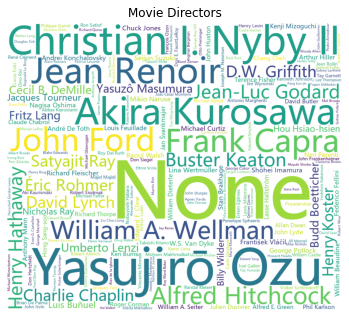

In [30]:
wordcloud6 = WordCloud(  background_color='white',font_path = 'msyh.ttc', width=1000, height=860, margin=2). \
generate_from_frequencies(df.director.value_counts().to_dict())

plt.figure (figsize= (6,6))
plt.imshow(wordcloud6)
plt.axis('off')
plt.title('Movie Directors')
plt.savefig('director.png')
plt.show()